**Question 1: Analyzing the Primary Factors Influencing the Development of New Energy Electric Vehicles in China, Establishing a Mathematical Model to Describe the Impact of These Factors on the Development of New Energy Electric Vehicles.**

Data Collection:
* Monthly sales data for electric vehicles nationwide from 2016 to 2022.
* Monthly unit prices for crude oil nationwide from 2016 to 2023.
* Monthly unit prices for 89, 92, and 95 octane gasoline in five cities (Beijing, Shanghai, Guangzhou, Jiangsu, and Zhejiang) from January 2023 to September 2023, along with monthly electric vehicle sales and the number of charging stations.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def get_file_path(folder_name):
    paths = []
    folder_name = os.path.join(os.curdir, folder_name)
    for file_name in os.listdir(folder_name):
        path = os.path.join(folder_name, file_name)
        if path.lower().endswith(".csv"):
            paths.append(path)
        else: paths.append(get_file_path(path))
    return paths

In [5]:
path = './5DomesticTypicalCityData'
file_paths = get_file_path(path)
datas = []
file_names = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].dt.strftime('%Y-%m')
    file_name = file_path[10:].split('.')[0]
    file_names.append(file_name)
    print(f'{file_name} Loaded')
    datas.append(df)
print(len(datas))

Beijing Loaded
Guangdong Loaded
Jiangsu Loaded
Shanghai Loaded
Zhejiang Loaded
5


In [6]:
for i in range(5):
    start_date = '2022-12-01'
    end_date = '2023-12-31'
    datas[i] = datas[i][(datas[i]['Date'] > start_date) & (datas[i]['Date'] <= end_date)]
    datas[i].reset_index(drop=True, inplace=True)
    print(datas[i].head(15))

      Date  89 Price  92 Price  95 Price  Charger  EVSales
0  2023-01      7.13      7.62      8.11   112494   5963.0
1  2023-02      7.29      7.79      8.29   114755   8694.0
2  2023-03      7.22      7.71      8.21   119518  15001.0
3  2023-04      7.26      7.75      8.25   121787  14929.0
4  2023-05      7.05      7.53      8.01   126517  13773.0
5  2023-06      7.06      7.54      8.03   128895  23743.0
6  2023-07      7.38      7.88      8.39   133799  24904.0
7  2023-08      7.60      8.12      8.65   137583  22063.0
8  2023-09      7.89      8.43      8.98   142078  19136.0
      Date  89 Price  92 Price  95 Price  Charger  EVSales
0  2023-01      7.09      7.64      8.28   395717  37504.0
1  2023-02      7.25      7.81      8.46   408332  50846.0
2  2023-03      7.17      7.73      8.37   433803  72057.0
3  2023-04      7.21      7.77      8.42   446644  67110.0
4  2023-05      7.01      7.55      8.18   472201  72310.0
5  2023-06      7.02      7.56      8.19   484941  87913

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 计算VIF
def calculate_vif(data_frame):
    variables = data_frame.values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    return vif_data

In [8]:
for i in range(5):
    data = datas[i]
    name = file_names[i]
    numeric_data_for_vif = data[['Charger', 'EVSales', '89 Price', '92 Price', '95 Price']]
    vif_result = calculate_vif(numeric_data_for_vif)
    print(f"{name} VIF Results:")
    print(vif_result)

Beijing VIF Results:
   Variable           VIF
0   Charger  1.823929e+03
1   EVSales  8.956142e+01
2  89 Price  1.533696e+07
3  92 Price  4.092921e+07
4  95 Price  1.137789e+07
Guangdong VIF Results:
   Variable           VIF
0   Charger  6.491334e+02
1   EVSales  1.060311e+02
2  89 Price  9.411352e+06
3  92 Price  1.468287e+07
4  95 Price  2.249729e+07
Jiangsu VIF Results:
   Variable           VIF
0   Charger  4.818857e+02
1   EVSales  1.661278e+02
2  89 Price  1.380601e+07
3  92 Price  1.483715e+07
4  95 Price  2.275417e+07
Shanghai VIF Results:
   Variable           VIF
0   Charger  4.074910e+02
1   EVSales  1.588392e+02
2  89 Price  3.733625e+07
3  92 Price  1.383276e+07
4  95 Price  5.717540e+07
Zhejiang VIF Results:
   Variable           VIF
0   Charger  1.165630e+02
1   EVSales  5.409272e+01
2  89 Price  5.006234e+06
3  92 Price  5.572923e+06
4  95 Price  8.527794e+06


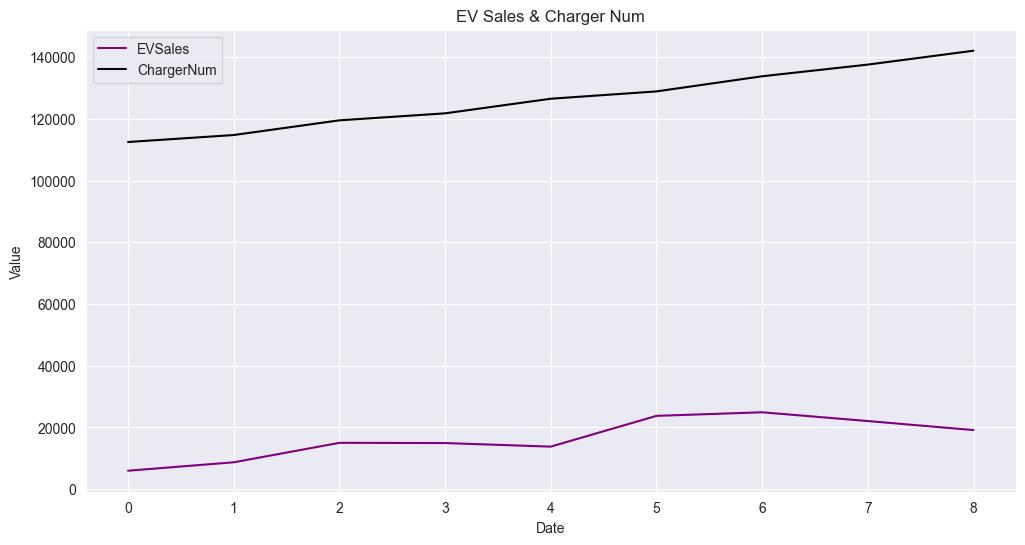

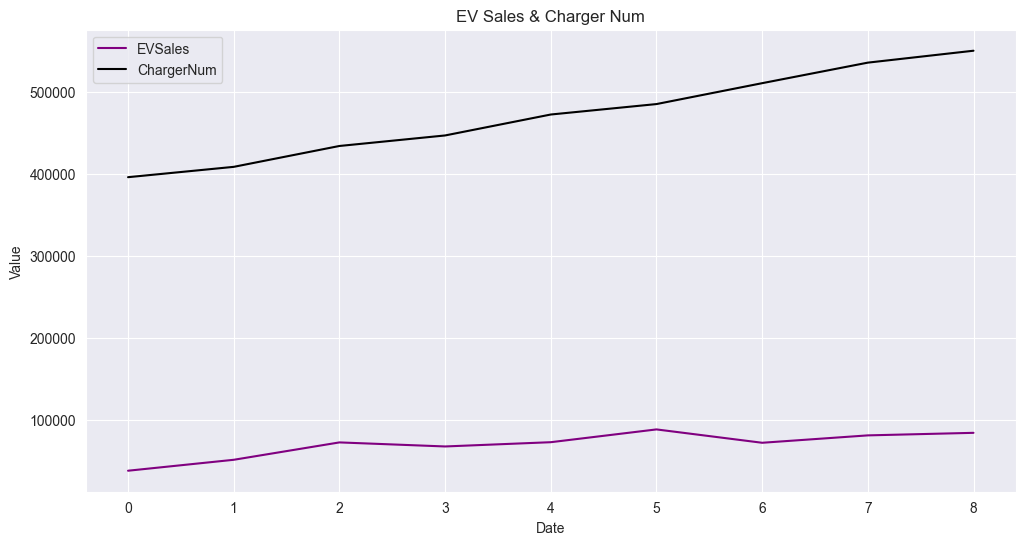

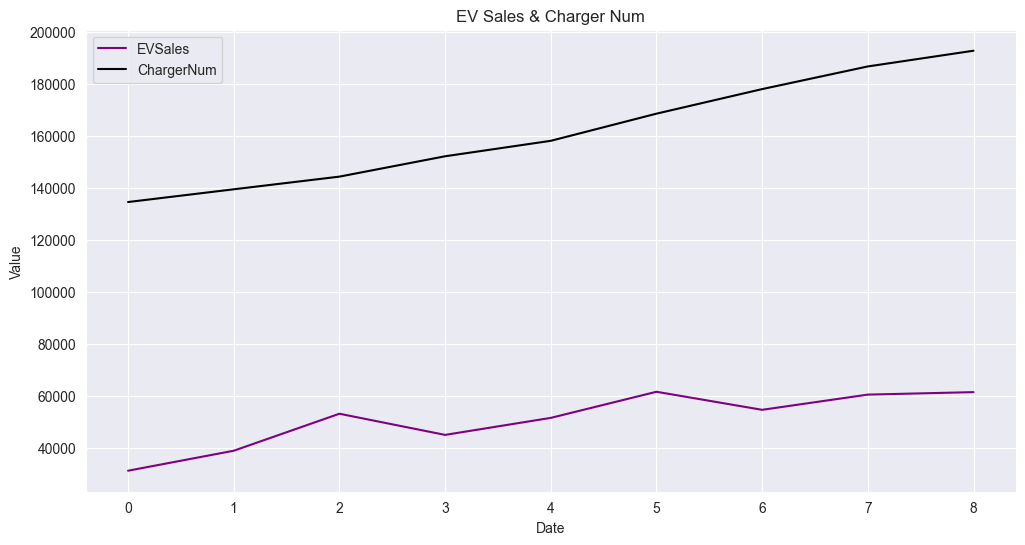

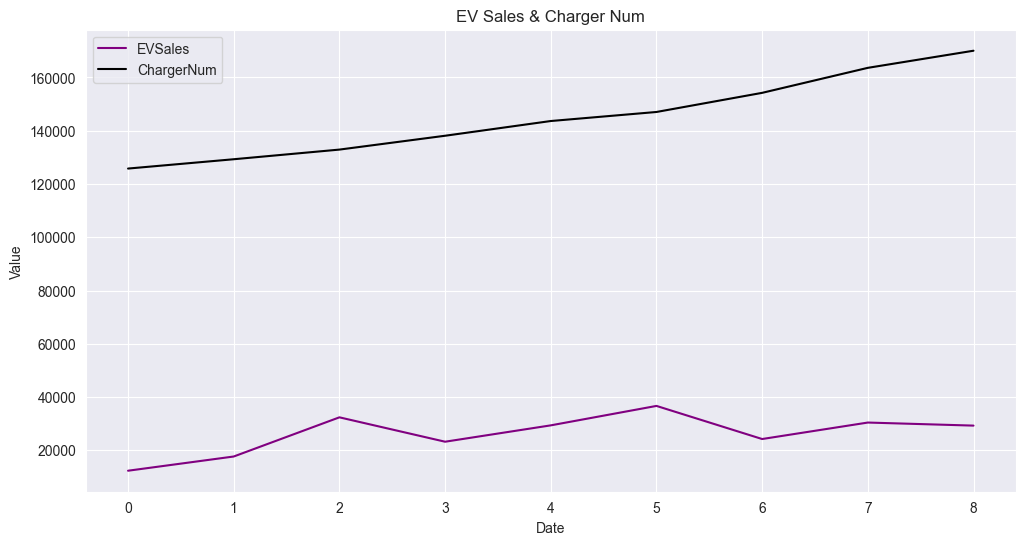

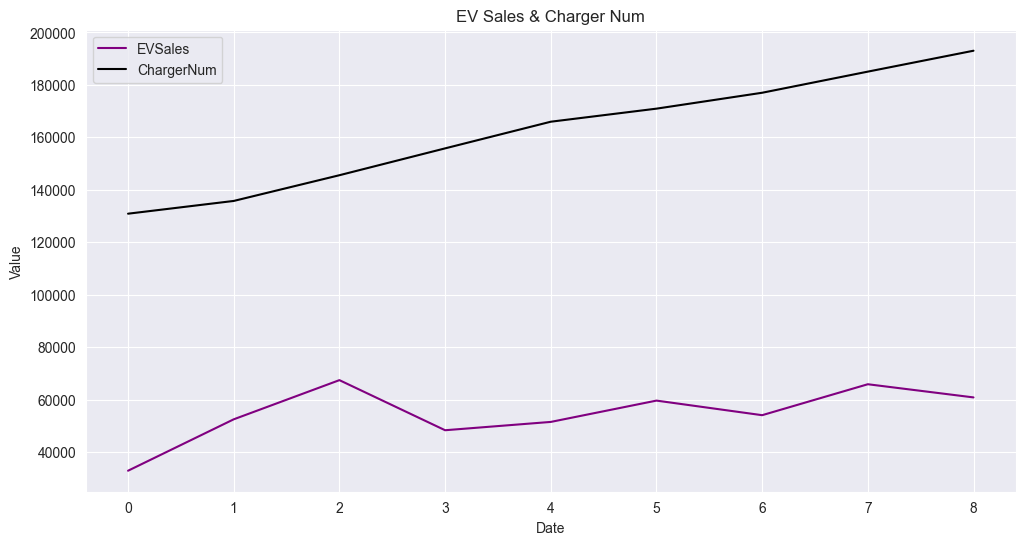

In [10]:
for i in range(5):
    data = datas[i]
    plt.figure(figsize=(12, 6))
    # data.set_index('Date', inplace=True)
    plt.plot(data['EVSales'], label='EVSales', color='purple')
    plt.plot(data['Charger'], label='ChargerNum', color='black')
    plt.title(f'EV Sales & Charger Num')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.savefig(f'{file_names[i]}_EVSales&ChargerNum.png')
    plt.show()

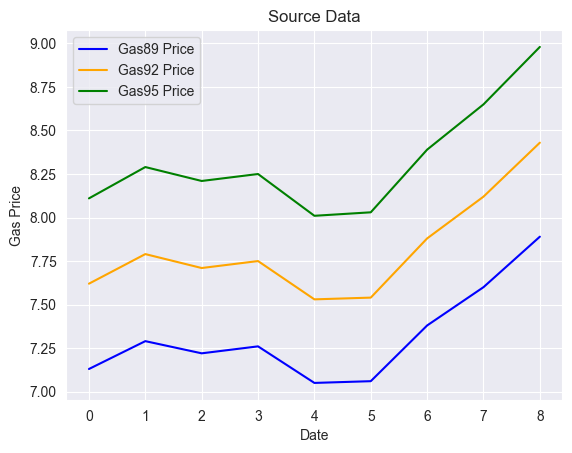

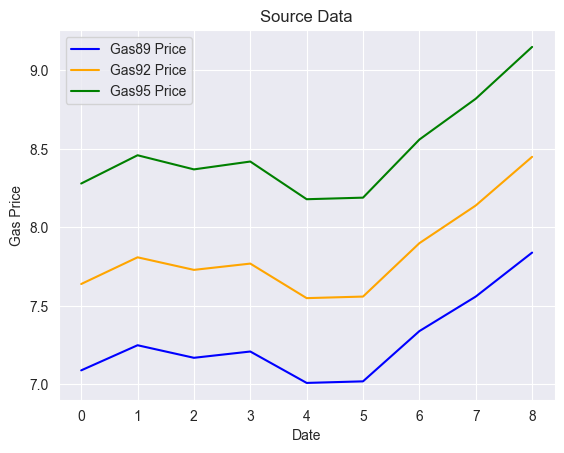

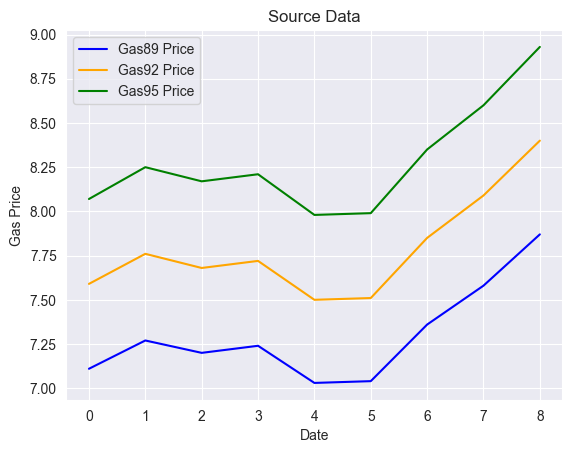

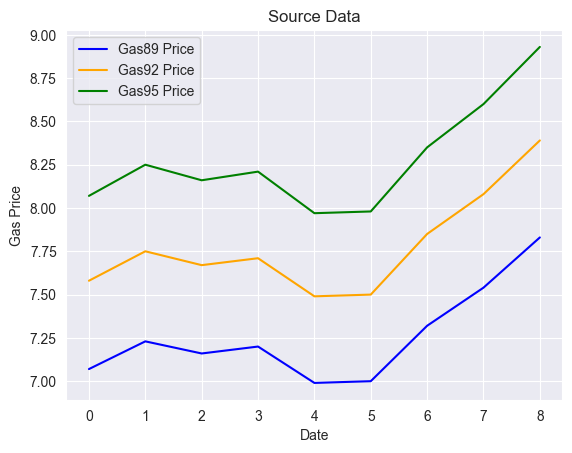

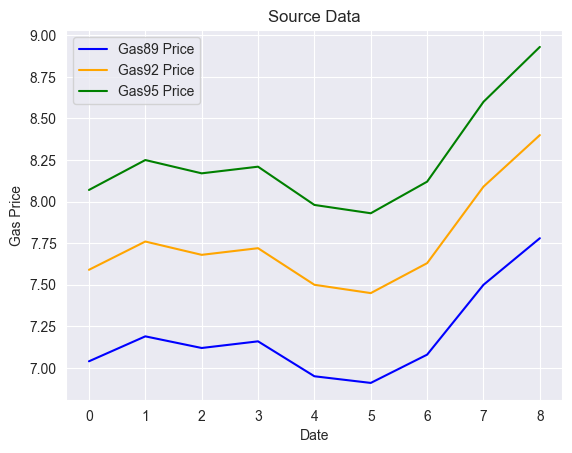

In [11]:
for i in range(5):
    data = datas[i]
    # data.set_index('Date', inplace=True)
    plt.plot(data['89 Price'], label='Gas89 Price', color='blue')
    plt.plot(data['92 Price'], label='Gas92 Price', color='orange')
    plt.plot(data['95 Price'], label='Gas95 Price', color='green')
    plt.title('Source Data')
    plt.xlabel('Date')
    plt.ylabel('Gas Price')
    plt.legend()
    plt.savefig(f'{file_names[i]}_GasPrice.png')
    plt.show()

Checking the Linearity of the Data: Preliminary examination of linear relationships can be conducted by plotting scatter plots between variables or calculating a correlation matrix.

In [ ]:
import seaborn as sns
for i in range(5):
    data = datas[i]
    name = file_names[i]
    print(name)
    pd.plotting.scatter_matrix(data[['Charger', 'EVSales', '89 Price', '92 Price', '95 Price']])
    plt.show()

    correlation_matrix = data[['Charger', 'EVSales', '89 Price', '92 Price', '95 Price']].corr()
    print("Correlation Matrix:")
    print(correlation_matrix)
    df = pd.DataFrame(correlation_matrix, columns=["Charger", "EVSales", "89 Price", "92 Price", "95 Price"])

    plt.figure(figsize=(10, 8))
    sns.heatmap(df, annot=True, cmap="coolwarm", fmt=".3f", linewidths=.5)
    plt.title("Correlation Heatmap")
    plt.savefig(f'{name}_Heatmap.png')

From the above results, it is evident that in the correlation matrix of the three selected indicators in the chosen cities, the correlations between variables predominantly fall between 0.5 and 1. This indicates a relatively strong linear relationship. It is noteworthy that the correlation coefficient between fuel prices and sales is less than 0.5.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
for i in range(5):
    print(file_names[i])
    data = datas[i]
    numeric_data = data[['Charger', 'EVSales', '89 Price', '92 Price', '95 Price']]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(numeric_data)

    pca = PCA()
    pca_result = pca.fit_transform(scaled_data)
    explained_variance_ratio = pca.explained_variance_ratio_

    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    plt.plot(cumulative_explained_variance, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance Plot')
    plt.show()

    num_components_to_keep = 2  # Choose a reasonable num of PC

    pca = PCA(n_components=num_components_to_keep)
    pca_result_selected = pca.fit_transform(scaled_data)

    for i in range(num_components_to_keep):
        data[f'Principal_Component_{i+1}'] = pca_result_selected[:, i]

    print(f"Explained Variance of Each Principal Component: {pca.explained_variance_ratio_}")

Attempting First-Order Differencing:

In [ ]:
from sklearn.linear_model import LinearRegression

for i in range(5):
    data = datas[i]
    numeric_data_for_diff = data[['Charger', 'EVSales', '89 Price', '92 Price', '95 Price']]
    diff_data = numeric_data_for_diff.diff().dropna()

    correlation_matrix_diff = diff_data.corr()
    print("Correlation Matrix of Differenced Data:")
    print(correlation_matrix_diff)

    X = diff_data[['Charger', '89 Price', '92 Price', '95 Price']]
    y = diff_data['EVSales']

    model = LinearRegression()
    model.fit(X, y)

    print("Model Coefficients:")
    print(dict(zip(X.columns, model.coef_)))

In [ ]:
for i in range(5):
    data = datas[i]
    print(file_names[i])
    numeric_data_for_diff = data[['Charger', 'EVSales', '89 Price', '92 Price', '95 Price']]

    diff_data = numeric_data_for_diff.diff().dropna()
    X = diff_data[['Charger', '89 Price', '92 Price', '95 Price']]
    y = diff_data['EVSales']

    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    pca = PCA()
    pca_result = pca.fit_transform(X_standardized)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)
    plt.plot(cumulative_explained_variance, marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance Plot')
    plt.show()

    num_components_to_keep = 1
    pca = PCA(n_components=num_components_to_keep)
    pca_result_selected = pca.fit_transform(scaled_data)

    for j in range(num_components_to_keep):
        data[f'Principal_Component_{j+1}'] = pca_result_selected[:, j]

    print(f"Explained Variance of Each Principal Component: {pca.explained_variance_ratio_}")
    print(data.head())